In [49]:

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import joblib
import io
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cros_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# %matplotlib notebook


## Predicting the productivity hours for writing the thesis

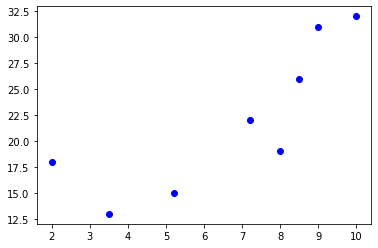

In [2]:
dataset = [
    [8.5, 26],
    [7.2, 22],
    [10, 32],
    [5.2, 15],
    [2, 18],
    [3.5, 13],
    [8, 19],
    [9, 31]]

X = np.array([[example[0]] for example in dataset])
Y = np.array([[example[1]] for example in dataset])
# Visualize the dataset
plt.scatter(X, Y, color="blue")
plt.show()


In [3]:
# Create linear regression model object
model = LinearRegression()

# Train the linear regression model
model.fit(X,Y)
Y_prime = model.predict(X)

# The mean squared error loss
mean_square_error = np.mean((Y_prime - Y)**2)
print("Mean Square error : {}".format(mean_square_error))

# The coefficients
print("Linear Equation : {}*x + {} ".format(model.coef_[0][0], model.intercept_[0]))

Mean Square error : 14.394185214981674
Linear Equation : 2.0577455975686063*x + 8.264548136229553 


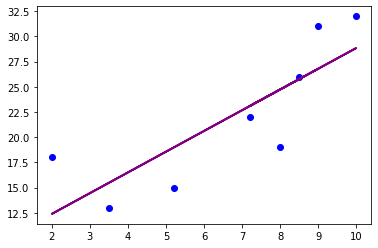

In [4]:
plt.scatter(X, Y, color="blue")
plt.plot(X, Y_prime, color="purple", linewidth=2)
plt.show()

## Predicting the Boston housing pricing 

In [5]:
from sklearn.datasets import load_boston
boston_dataset =  load_boston()

C:\Users\SAIFUALLAH\anaconda3\envs\beamng\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [6]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [7]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
boston_frame =  pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_frame["Y"] = boston_dataset.target


In [9]:
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
boston_frame.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Y          0
dtype: int64

C:\Users\SAIFUALLAH\anaconda3\envs\beamng\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


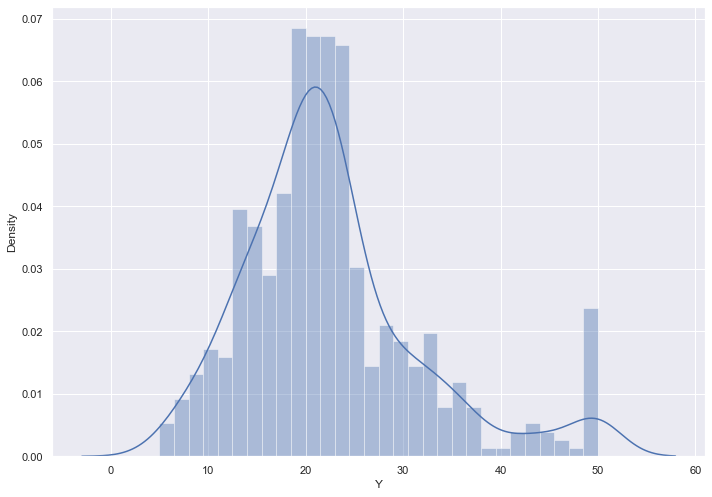

In [12]:
### Exploratory Data Analysis is a very important step before training the model. Here i  will use some visualizations to understand
### the relationship of the target variable with other features.

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.distplot(boston_frame.Y, bins=30)
plt.show()
 
## We see that the values of MEDV are distributed normally with few outliers.


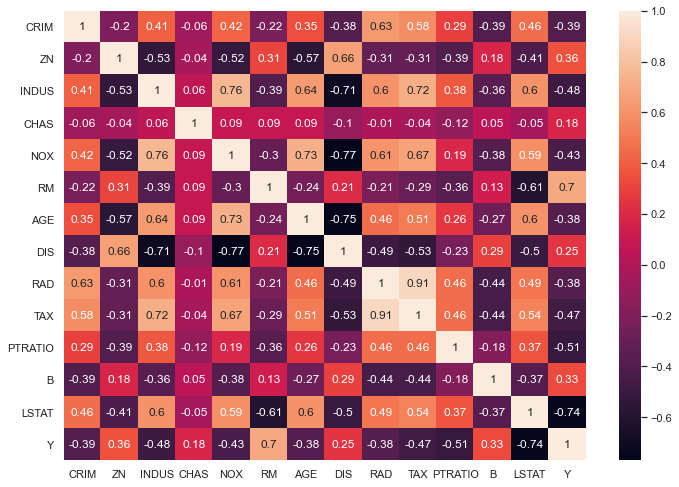

In [13]:
## Next, we create a correlation matrix that measures the linear relationships between the variables.
## The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
## I will use the heatmap function from the seaborn library to plot the correlation matrix
correlation_matrix = boston_frame.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## The correlation coefficient ranges from -1 to 1. If the value is close to 1, 
## it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

## Observations: 
# 1.    To fit a linear regression model, we select those features which have a high correlation with our target variable Y. 
#           By looking at the correlation matrix we can see that RM has a strong positive correlation with Y(0.7) 
#           where as LSTAT has a high negative correlation with Y(-0.74).
# 2.    An important point in selecting features for a linear regression model is to check for multi-co-linearity. 
#           The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. 
#           We should not select both these features together for training the model. Check this for an explanation.  https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150
#           Same goes for the features DIS and AGE which have a correlation of -0.75.


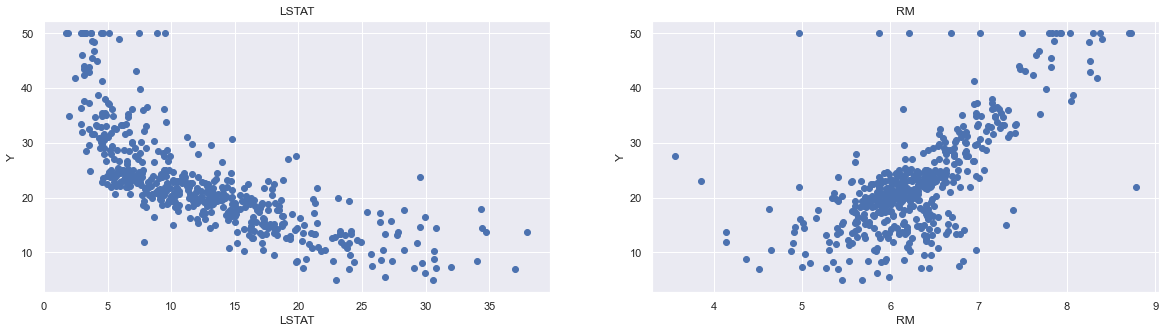

In [14]:
# Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston_frame['Y']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston_frame[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Y')

## Observations:
#   The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
#   The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.


In [15]:
X = pd.DataFrame(np.c_[boston_frame['LSTAT'], boston_frame['RM']], columns=['LSTAT', 'RM'])
Y = boston_frame['Y']


In [16]:
# Initialize train and test splits from the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(102, 2)
(404,)
(102,)


In [17]:
## Model Train
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression()

In [18]:
# Model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(sklearn.metrics.mean_squared_error(Y_train, y_train_predict)))
r2 = sklearn.metrics.r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(sklearn.metrics.mean_squared_error(Y_test, y_test_predict)))
r2 = sklearn.metrics.r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


# Evaluating the performance of the model
#   We will be using Root mean squared error(RMSE) and Coefficient of Determination(R² score) to evaluate our model.
#   RMSE is the square root of the average of the sum of the squares of residuals.
# R² score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the least square regression


The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


(506, 13)


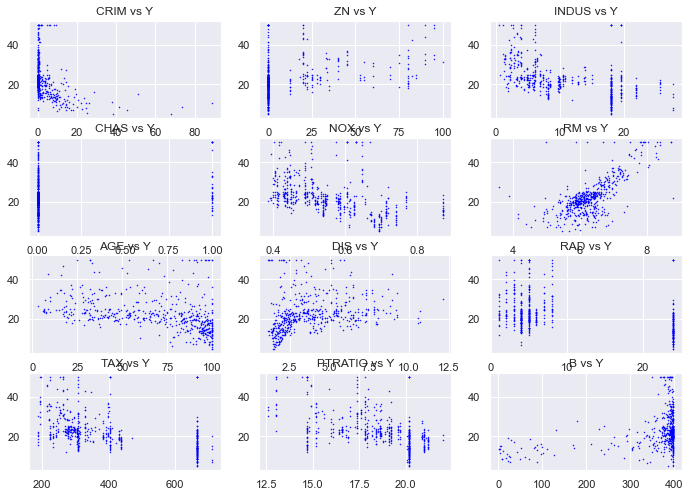

In [19]:
X = boston_frame.drop("Y", axis=1)
Y = boston_frame["Y"]
print(X.shape)

# Plot the Features X vs Y 
f, axarr = plt.subplots(4, 3)
key_index = 0
X_array = np.array(X)
for i in range(4):
    for j in range(3):
        feature_name = boston_dataset.feature_names[key_index]
        axarr[i][j].scatter(X_array[:, key_index], Y, s=0.25, color="blue")
        axarr[i][j].set_title("{} vs Y".format(feature_name))
        key_index += 1

plt.show()


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [21]:
LM = LinearRegression()
LM.fit(X_train, Y_train)

Y_train_pred = LM.predict(X_train)
Y_test_pred  = LM.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train_pred, Y_train)
test_mse  = sklearn.metrics.mean_squared_error(Y_test_pred, Y_test)

print("Train MSE = {}".format(train_mse))
print("Test MSE  = {}".format(test_mse))

## As the testing error is greater than the training error the dataset is overfitting 
## We can use a regularized loss function e.g the Regularized Ridge Regression, Lasso, Elastic ... difference is how much we want to penalize the weights of the model 

Train MSE = 18.87900085091601
Test MSE  = 32.44253669600653


In [22]:
LM = Ridge(alpha=0.5)
LM.fit(X_train, Y_train)

Y_train_pred = LM.predict(X_train)
Y_test_pred = LM.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train_pred, Y_train)
test_mse = sklearn.metrics.mean_squared_error(Y_test_pred, Y_test)

print("Train MSE = {}".format(train_mse))
print("Test MSE  = {}".format(test_mse))


Train MSE = 18.944829915007595
Test MSE  = 32.80395585252011


# Ad Click Project from Avazu 

In [23]:
### Kaggle link https://www.kaggle.com/c/avazu-ctr-prediction


In [34]:
data_frame = pd.read_csv("avazu_dataset/train/train.csv", nrows=3000)

In [35]:
data_frame.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [36]:
data_frame.describe() ## does not make sense as all the features values are categories 

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,3.000000e+03,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.0000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,9.405624e+18,0.164000,14102100.0,1005.039667,0.190000,1.056667,0.191667,17725.0710,318.508000,57.321333,1967.710333,0.787667,125.381333,39037.623000,87.885000
std,2.623944e+18,0.370337,0.0,1.042652,0.397433,0.564708,0.625882,3061.8278,9.108765,38.250409,376.360849,1.229804,228.632209,48831.445052,44.748265
min,1.004777e+16,0.000000,14102100.0,1001.000000,0.000000,0.000000,0.000000,377.0000,216.000000,36.000000,112.000000,0.000000,35.000000,-1.000000,13.000000
25%,1.007712e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,15704.0000,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,61.000000
50%,1.019499e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,17653.0000,320.000000,50.000000,1955.000000,0.000000,35.000000,-1.000000,79.000000
75%,1.031123e+19,0.000000,14102100.0,1005.000000,0.000000,1.000000,0.000000,20362.0000,320.000000,50.000000,2283.000000,2.000000,39.000000,100084.000000,117.000000
max,1.043073e+19,1.000000,14102100.0,1010.000000,4.000000,5.000000,5.000000,21704.0000,320.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000


In [37]:
## Converting Categorical data to Numberic data
## One-hot encoding or one hot vector
pd.get_dummies(data_frame["site_category"], prefix="site_category").head()

,site_category_0569f928,site_category_110ab22d,site_category_28905ebd,site_category_335d28a8,site_category_3e814130,site_category_50e219e0,site_category_72722551,site_category_75fa27f6,site_category_76b2941d,site_category_bcf865d9,site_category_c0dd3be3,site_category_f028772b,site_category_f66779e6
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
## One-Hot encoding all the categories
exclude_from_transformation = ["id", "click", "hour"]
headers = data_frame.columns.tolist()
for header in headers:
    if header in exclude_from_transformation:
        continue
    one_hot = pd.get_dummies(data_frame[header], prefix=header)
    data_frame = data_frame.drop(header, axis=1)
    data_frame = data_frame.join(one_hot)



In [39]:
X = data_frame.drop(["click", "id", "hour"], axis=1)
Y = data_frame["click"]
print(X.shape)

(3000, 4472)


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12)


In [44]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

Y_train_pred = LR.predict(X_train)
train_mse = sklearn.metrics.mean_squared_error(Y_train_pred, Y_train)
rmse_train = np.sqrt(train_mse)
r2_train = sklearn.metrics.r2_score(Y_train_pred, Y_train)


Y_test_pred = LR.predict(X_test)
test_mse = sklearn.metrics.mean_squared_error(Y_test_pred, Y_test)
rmse_test = np.sqrt(test_mse)
r2_test  = sklearn.metrics.r2_score(Y_test_pred, Y_test)

print("Train MSE is = {}".format(train_mse))
print("Test  MSE is = {}".format(test_mse))

print("Train RMSE is = {}".format(rmse_train))
print("Test RMSE is  = {}".format(rmse_test))

print("Train R2 is = {}".format(r2_train))
print("Test  R2 is = {}".format(r2_test))


Train MSE is = 0.00562956706682841
Test  MSE is = 2.457245610940062e+23
Train RMSE is = 0.07503044093451944
Test RMSE is  = 495706123720.50256
Train R2 is = 0.9566661172489258
Test  R2 is = -4.3090897364539416e-05


In [57]:
LM_ridge = Ridge(alpha=5)
LM_ridge.fit(X_train, Y_train)

Y_train_pred = LM_ridge.predict(X_train)
Y_test_pred = LM_ridge.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train_pred, Y_train)
test_mse = sklearn.metrics.mean_squared_error(Y_test_pred, Y_test)

rmse_train = np.sqrt(train_mse)
rmse_test = np.sqrt(test_mse)

r2_train = sklearn.metrics.r2_score(Y_train_pred, Y_train)
r2_test  = sklearn.metrics.r2_score(Y_test_pred, Y_test)

print("Train MSE is = {}".format(train_mse))
print("Test  MSE is = {}".format(test_mse))

print("Train RMSE is = {}".format(rmse_train))
print("Train RMSE is = {}".format(rmse_test))

print("Train RMSE is = {}".format(r2_train))
print("Train RMSE is = {}".format(r2_test))


Train MSE is = 0.06891818775913752
Test  MSE is = 0.1349613096143305
Train RMSE is = 0.2625227376040741
Train RMSE is = 0.36737080669853245
Train RMSE is = -1.5281723624353347
Train RMSE is = -6.064523829206151


[0.1        0.64444444 1.18888889 1.73333333 2.27777778 2.82222222
 3.36666667 3.91111111 4.45555556 5.        ]


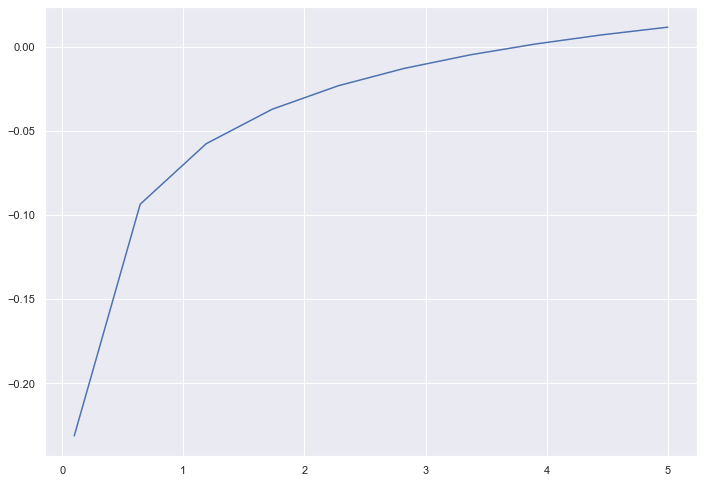

In [55]:
## what is the best the alpha or hyper parameter tuning values..

# joblib.dump(LM_ridge, "avazu_ridge_model.pkl")



LM_ridge = Ridge()
alphas = np.linspace(0.1, 5, 10)
print(alphas)
n_folds = 3
clf = GridSearchCV(LM_ridge, [{"alpha": alphas}], cv=n_folds)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
plt.plot(alphas, scores)

##  the best alpha value is 5

In [56]:
scores


array([-0.23140798, -0.09361639, -0.05764446, -0.03713311, -0.02318213,
       -0.01284734, -0.0047838 ,  0.0017335 ,  0.00713814,  0.01170874])